In [37]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torchvision.transforms as transforms
from Anchor.anchor import Anchor, Tasktype
from torchvision.models import inception_v3, resnet18
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([162])
tensor(162)
beagle 0.6757827401161194
tensor(166)
Walker hound 0.219479501247406
tensor(167)
English foxhound 0.08423861861228943
tensor(161)
basset 0.019225919619202614
tensor(253)
basenji 0.0008010211167857051


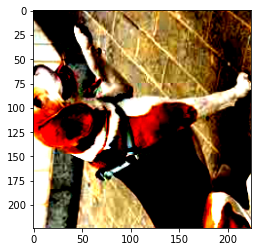

In [4]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
image = Image.open("../static/dog_paper.jpeg")
input = preprocess(image).unsqueeze(0)
model = resnet18(pretrained=True)
model.eval()
plt.imshow(input.squeeze().permute(2,1,0))

with torch.no_grad():
    output = model(input)

print(torch.argmax(output, dim=1))
probs = torch.nn.functional.softmax(output[0], dim=0)

with open("../static/imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probs, 5)
    top5_prob, top5_catid = top5_prob.squeeze(), top5_catid.squeeze()
    for i in range(top5_prob.size(0)):
        print(top5_catid[i])
        print(categories[top5_catid[i]], top5_prob[i].item())

In [38]:
preprocess = transforms.ToTensor()
image = Image.open("../static/dog_paper.jpeg").rotate(90)
input = preprocess(image)
model = resnet18(pretrained=True)
model.eval()
explainer = Anchor(Tasktype.IMAGE)
anchor, segments = explainer.explain_instance(input.permute(2,1,0), model, "greedy", 100)

INFO: Start Sampling
INFO: Start greedy search
/Users/ironmonkeyapps/Desktop/Studium/Master/Semester3/Interpretable/final-project/iml-ws21-projects-risingnumpygods/Anchor/bandit.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  lb[f] = KL_LUCB.dlow_bernoulli(means[f], beta / candidates[f].n_samples)
/Users/ironmonkeyapps/Desktop/Studium/Master/Semester3/Interpretable/final-project/iml-ws21-projects-risingnumpygods/Anchor/bandit.py:101: RuntimeWarning: divide by zero encountered in double_scalars
  ub[f] = KL_LUCB.dup_bernoulli(means[f], beta / candidates[f].n_samples)


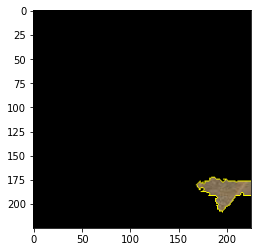

In [42]:
print(anchor.feature_mask)
idxs = np.argwhere(segments!=anchor.feature_mask)
# input[:, idxs[:, 0], idxs[:, 1]] = 0
# plt.imshow(input.squeeze().permute(2,1,0))

img = mark_boundaries(input.permute(2,1,0).numpy(), segments)
img[idxs[:, 0], idxs[:, 1], :] = 0
plt.imshow(img)

In [36]:
print(anchor.precision)

0.9
